In [72]:
from skimage.feature import local_binary_pattern
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std

In [73]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra
from sklearn.metrics import jaccard_score
from sklearn.decomposition import PCA
from skimage.io import imread, imshow
from skimage.transform import  resize
from google.colab import drive
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from skimage.filters import prewitt_h,prewitt_v

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [74]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
from os import listdir
from os.path import isfile, join

mypath = '/content/drive/MyDrive/notebooks /archive-4/Augmented Images/Augmented Images/combined '

#Source: https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
image_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [76]:
## Define a dictionary named 'image_categories'
image_categories = {'Category':[]
                    ,'Image_Name':[]
                    }
                    ## This list will store the categories of the images.
                    # This list will store the names of the images.

In [77]:

## Iterate through each image filename in the list
for image in image_files:
    if image.startswith('M'):
        image_categories['Category'].append('M')
        image_categories['Image_Name'].append(image)
    elif image.startswith('NM'):
        image_categories['Category'].append('NM')
        image_categories['Image_Name'].append(image)



In [78]:
df = pd.DataFrame(image_categories)

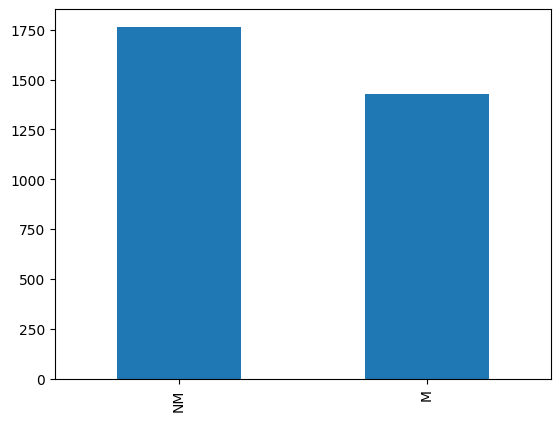

In [79]:
#created a bar plot
df['Category'].value_counts().plot(kind='bar');

In [80]:
#counting the values in category.
df['Category'].value_counts()

NM    1764
M     1428
Name: Category, dtype: int64

In [81]:
Samplesize = 1428  #number of samples that you want
#source: https://stackoverflow.com/questions/41858827/selecting-n-elements-of-each-class
df = df.groupby('Category', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, Samplesize, False),:])

In [82]:
#rechecking the value to make sure it matches.
df['Category'].value_counts()

M     1428
NM    1428
Name: Category, dtype: int64

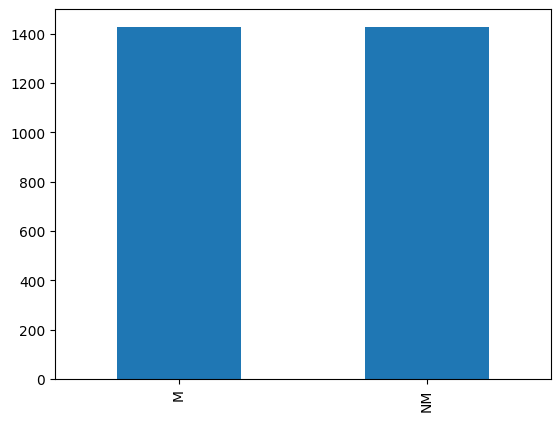

In [83]:
#created a bar plot again
df['Category'].value_counts().plot(kind='bar');

In [84]:
#checking the category feature.
df['Category']

0  2602     M
   2631     M
   2180     M
   2886     M
   1455     M
           ..
1  2819    NM
   643     NM
   117     NM
   935     NM
   649     NM
Name: Category, Length: 2856, dtype: object

In [85]:
## Filter the DataFrame 'df' based on specific categories

df1 = df.loc[(df['Category'] == "M" ) | (df['Category'] == "NM" )]

In [86]:
## Create a dictionary named 'categories'
categories= {'M vs NM': df1,

            }

In [87]:
df1

Category       Image_Name
0 2602        M    M34_02_12.jpg
  2631        M    M52_01_04.jpg
  2180        M    M14_01_09.jpg
  2886        M    M44_01_08.jpg
  1455        M    M27_01_01.jpg
...         ...              ...
1 2819       NM  NM104_01_10.jpg
  643        NM   NM62_01_05.jpg
  117        NM   NM60_01_12.jpg
  935        NM   NM74_01_03.jpg
  649        NM   NM86_01_11.jpg

[2856 rows x 2 columns]

In [88]:
for comparison in categories:
  df = categories[comparison]

  image_list = df['Image_Name'].tolist()
  #print(image_list)

  # type of LBP
  METHOD = 'uniform'  # at most two circular 0-1 or 1-0 transitions
  radius = 1  # distance between central pixels and comparison pixels
  n_points = 8 * radius  # define number of comparison pixels

  # create list for LBP representations
  #lbp_imgs = []
  all_features= []

  # create LBP for each image and add to list
  count = 0
  for i in image_list:
    #print(i)
    count += 1
    print(count, end=' ')
    #the path of the image
    image_path = mypath + '/' + i
    #reading in the image
    image = imread(image_path)

    image = resize(image, (100,100))

    #finding the sum of the RGB values for all 3 RGB bands for each pixel
    rgb_feature_matrix = image[:,:,0] + image[:,:,1] + image[:,:,2]
    #finding the average RGB value for each pixel by dividing by 3
    rgb_feature_matrix = rgb_feature_matrix / 3

    #flattening the features array into a single 1D vector
    rgb_features = np.reshape(rgb_feature_matrix, (100*100))

    #lbp feature extraction

    gray_image = rgb2gray(image)

    lbp_image = local_binary_pattern(gray_image, n_points, radius, METHOD)
    lbp_features = np.reshape(lbp_image, (100*100))

    horizontal_edges = prewitt_h(gray_image)
    #print(horizontal_edges.shape)
    horizontal_edges = np.reshape(horizontal_edges, (100*100))


    #calculating vertical edges using prewitt kernel
    vertical_edges = prewitt_v(gray_image)

    vertical_edges = np.reshape(vertical_edges, (100*100))

    all_features.append(np.concatenate( (rgb_features, lbp_features, horizontal_edges, vertical_edges) ))

    #converting list to np array
  all_features  = np.array(all_features)







1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [95]:
NUM_CLASSES = 2

In [96]:
#separating features from the labels
X = all_features
y = df['Category'].values

#splitting your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#standardizing the data without a scaler
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [97]:
# Creating a Multi-Layer Perceptron (MLP) Model using Keras
mlp_model = Sequential([

    # The first dense layer with 512 neurons and a Rectified Linear Unit (ReLU) activation.
    # The 'input_shape' specifies the shape of the input data (i.e., 40000 features per sample).
    Dense(512, activation='relu', input_shape=(40000,)),

    # A dropout layer randomly sets 50% of the input units to 0 at each update during training,
    # which helps to prevent overfitting.
    Dropout(0.5),

    # Another dense layer with 256 neurons and a ReLU activation.
    Dense(256, activation='relu'),

    # Another dropout layer for regularization. It also helps in preventing overfitting.
    Dropout(0.5),

    # The final dense layer that outputs probability distributions over classes using the softmax activation.
    # The number of neurons here corresponds to the number of classes in the dataset.
    Dense(NUM_CLASSES, activation='softmax')
])

In [98]:
# Configuring the learning process of the MLP model
mlp_model.compile(
    # Using the Adam optimization algorithm to adjust weights during training.
    # It combines the advantages of other extensions of stochastic gradient descent.
    optimizer='adam',

    # This loss function is used when the targets are integers. It computes the cross-entropy
    # between true labels and predicted labels, which is suitable for multi-class classification.
    loss='sparse_categorical_crossentropy',

    # Metrics to be evaluated by the model during training and testing.
    # Here, we're interested in the 'accuracy' of our predictions.
    metrics=['accuracy']
)

In [ ]:
# Training the MLP model using the training data
mlp_history = mlp_model.fit(
    # The input data for training, which are the features (e.g., pixel values of images).
    X_train,

    # The true labels (or targets) for each sample in the training data.
    y_train,

    # Number of times the learning algorithm will work through the entire training dataset.
    # One epoch means one forward pass and one backward pass of all the training examples.
    epochs=100,

    # Reserving 20% of the training data for validation. After each epoch, the model will
    # use this validation data to gauge its performance, like accuracy and loss.
    validation_split=0.2,

    # Specifies the number of samples to use in each update of the model weights.
    # For instance, with a batch size of 16, the model updates its weight after every 16 samples.
    batch_size=16
)

In [ ]:
# Using the trained MLP model to predict the labels for the test dataset.
y_pred_mlp = mlp_model.predict(X_test)

# The 'predict' method returns probability distributions for each class.
# Using 'argmax', we identify the index (class) with the highest probability for each sample.
y_pred_mlp_classes = np.argmax(y_pred_mlp, axis=1)

# Displaying a header for the upcoming classification report.
print("MLP Classification Report:")

# Printing a detailed classification report that includes metrics like precision, recall, and f1-score.
# 'y_test' contains true labels, while 'y_pred_mlp_classes' contains the predicted labels from the model.
print(classification_report(y_test, y_pred_mlp_classes))